In [116]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df_sirh = pd.read_csv('extrait_sirh.csv')
df_eval = pd.read_csv('extrait_eval.csv')
df_sondage = pd.read_csv('extrait_sondage.csv')

In [118]:
display(df_sirh.head())
print(df_sirh.shape)
display(df_eval.head())
print(df_eval.shape)
display(df_sondage.head())
print(df_sondage.shape)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


(1470, 12)


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


(1470, 10)


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


(1470, 12)


In [119]:
# Exemple : nettoyage automatique
def clean_percent(x):
    """Convertit une chaîne de pourcentage '23 %' en float 23.0"""
    if isinstance(x, str) and "%" in x:
        return float(x.replace("%", "").strip())
    return x

df_eval["augementation_salaire_precedente"] = df_eval["augementation_salaire_precedente"].apply(clean_percent)

# Normalisation des colonnes Oui/Non
df_sondage["a_quitte_l_entreprise"] = (
    df_sondage["a_quitte_l_entreprise"].astype(str).str.strip().str.lower()
)


In [120]:
# Comptage des valeurs uniques
for col in ["genre", "poste", "departement", "statut_marital"]:
    print(f"\n{col} :")
    print(df_sirh[col].value_counts())



genre :
genre
M    882
F    588
Name: count, dtype: int64

poste :
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64

departement :
departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

statut_marital :
statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64


In [121]:
# Nettoyage de la clé dans df_eval
df_eval["id_employee"] = df_eval["eval_number"].str.replace("E_", "").astype(int)

# Jointure multi-fichiers
joins_df = df_sirh.merge(df_eval, on="id_employee", how="left") \
                  .merge(df_sondage, left_on="id_employee", right_on="code_sondage", how="left")

print(joins_df.shape)
joins_df.head()


(1470, 34)


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [122]:
print("Âge moyen :", joins_df["age"].mean())
print("Revenu médian :", joins_df["revenu_mensuel"].median())
print("Note moyenne actuelle :", joins_df["note_evaluation_actuelle"].mean())

Âge moyen : 36.923809523809524
Revenu médian : 4919.0
Note moyenne actuelle : 3.1537414965986397


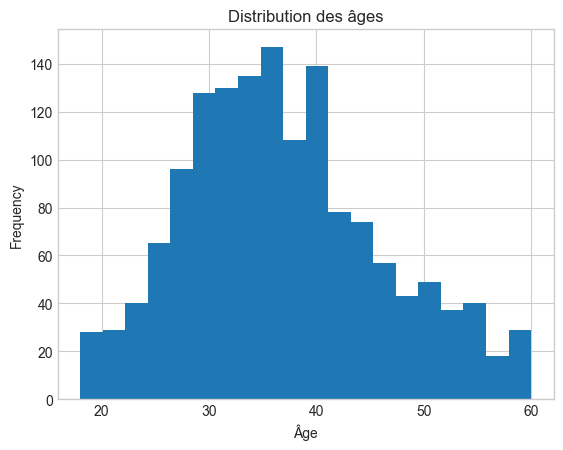

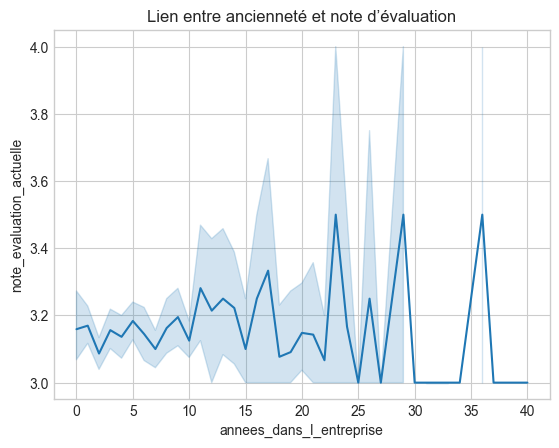

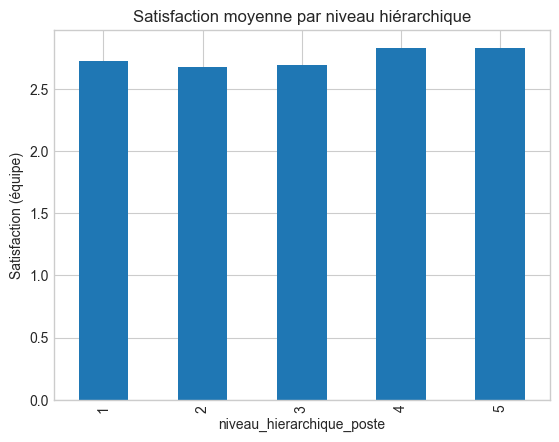

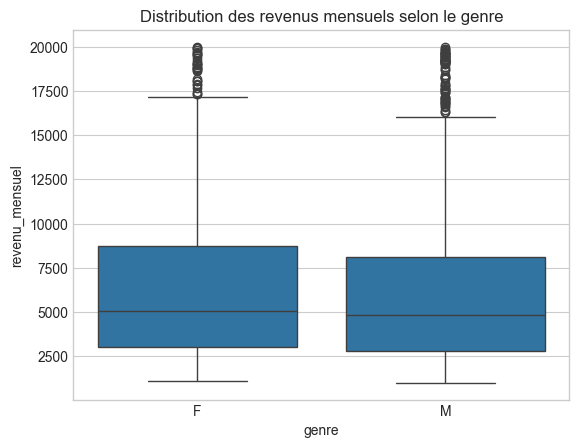

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Histogramme des âges
joins_df["age"].plot(kind="hist", bins=20, title="Distribution des âges")
plt.xlabel("Âge")
plt.show()

# Relation entre note et ancienneté
sns.lineplot(data=joins_df, x="annees_dans_l_entreprise", y="note_evaluation_actuelle")
plt.title("Lien entre ancienneté et note d’évaluation")
plt.show()

# Satisfaction moyenne par niveau hiérarchique
joins_df.groupby("niveau_hierarchique_poste")["satisfaction_employee_equipe"].mean().plot(
    kind="bar", title="Satisfaction moyenne par niveau hiérarchique"
)
plt.ylabel("Satisfaction (équipe)")
plt.show()

# Revenus selon le genre
sns.boxplot(data=joins_df, x="genre", y="revenu_mensuel")
plt.title("Distribution des revenus mensuels selon le genre")
plt.show()


Nombre d'employés ayant quitté l'entreprise : 237


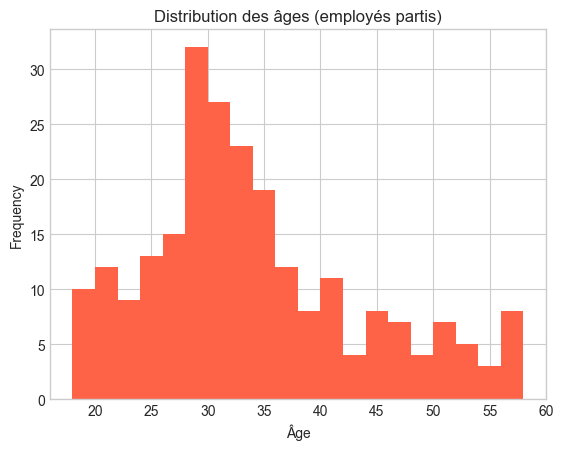

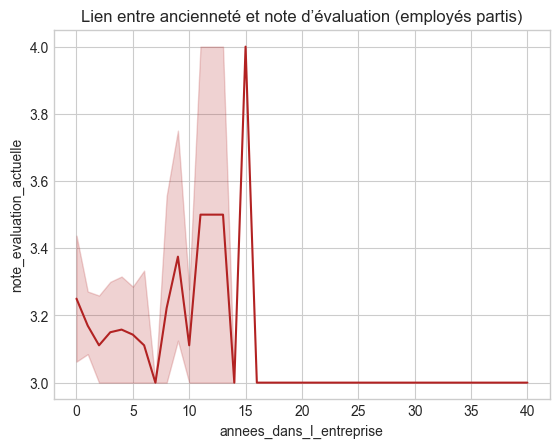

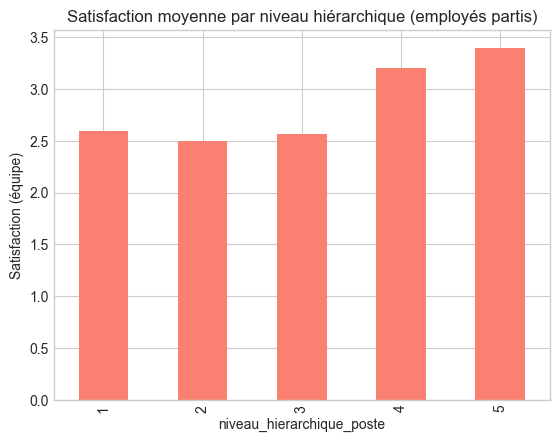

C:\Users\mouto\AppData\Local\Temp\ipykernel_19792\3037496481.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


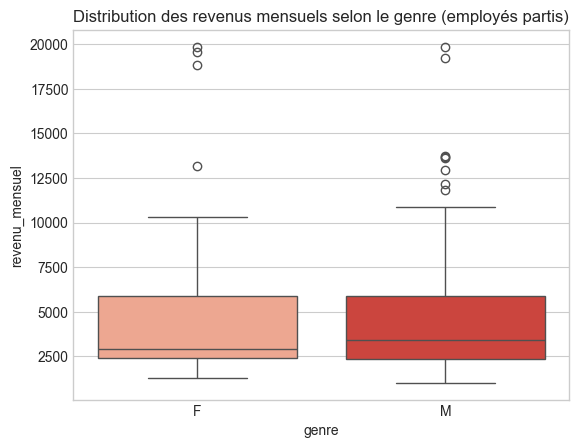

In [124]:
plt.style.use("seaborn-v0_8-whitegrid")

# Filtrage : employés ayant quitté l'entreprise
df_quittes = joins_df[joins_df["a_quitte_l_entreprise"].str.lower() == "oui"]

print(f"Nombre d'employés ayant quitté l'entreprise : {len(df_quittes)}")

# === Histogramme des âges ===
df_quittes["age"].plot(kind="hist", bins=20, color="tomato", title="Distribution des âges (employés partis)")
plt.xlabel("Âge")
plt.show()

# === Relation entre note et ancienneté ===
sns.lineplot(
    data=df_quittes,
    x="annees_dans_l_entreprise",
    y="note_evaluation_actuelle",
    color="firebrick"
)
plt.title("Lien entre ancienneté et note d’évaluation (employés partis)")
plt.show()

# === Satisfaction moyenne par niveau hiérarchique ===
df_quittes.groupby("niveau_hierarchique_poste")["satisfaction_employee_equipe"].mean().plot(
    kind="bar", color="salmon",
    title="Satisfaction moyenne par niveau hiérarchique (employés partis)"
)
plt.ylabel("Satisfaction (équipe)")
plt.show()

# === Revenus selon le genre ===
sns.boxplot(
    data=df_quittes,
    x="genre",
    y="revenu_mensuel",
    palette="Reds"
)
plt.title("Distribution des revenus mensuels selon le genre (employés partis)")
plt.show()

Restés : 1233 | Partis : 237


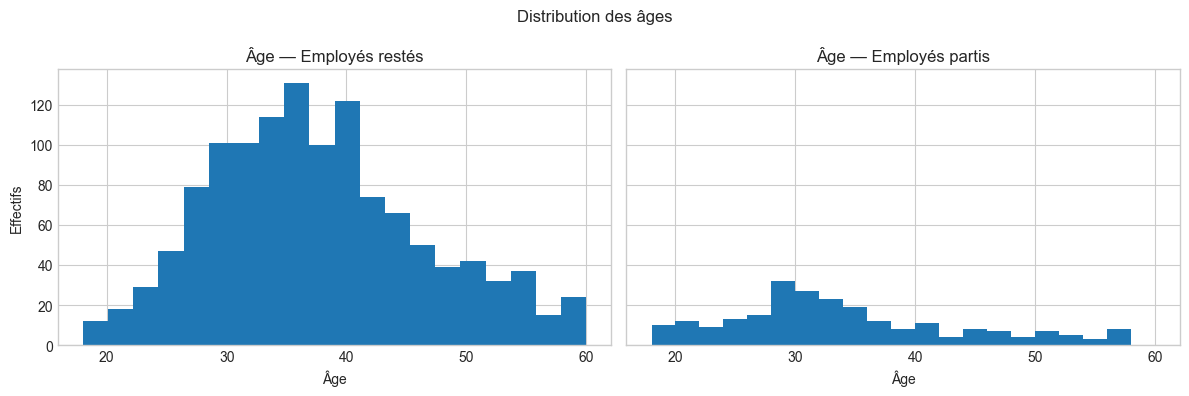

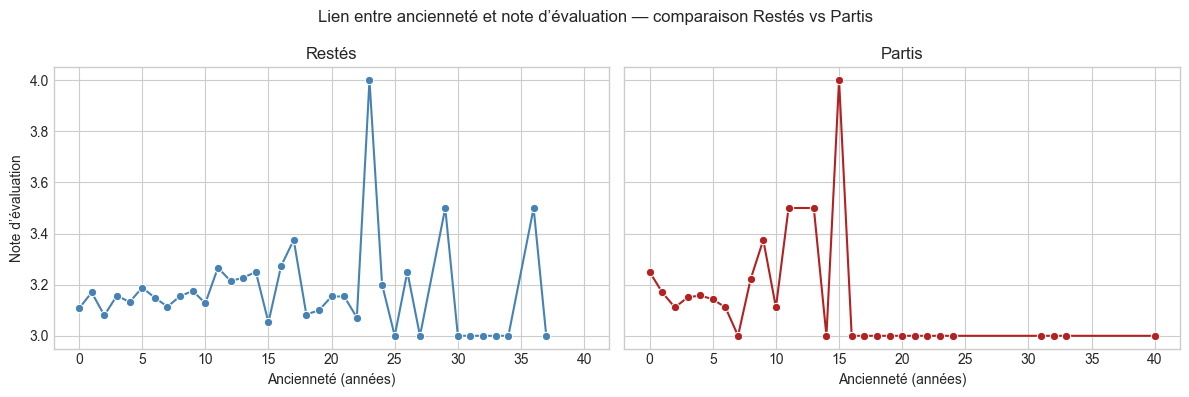

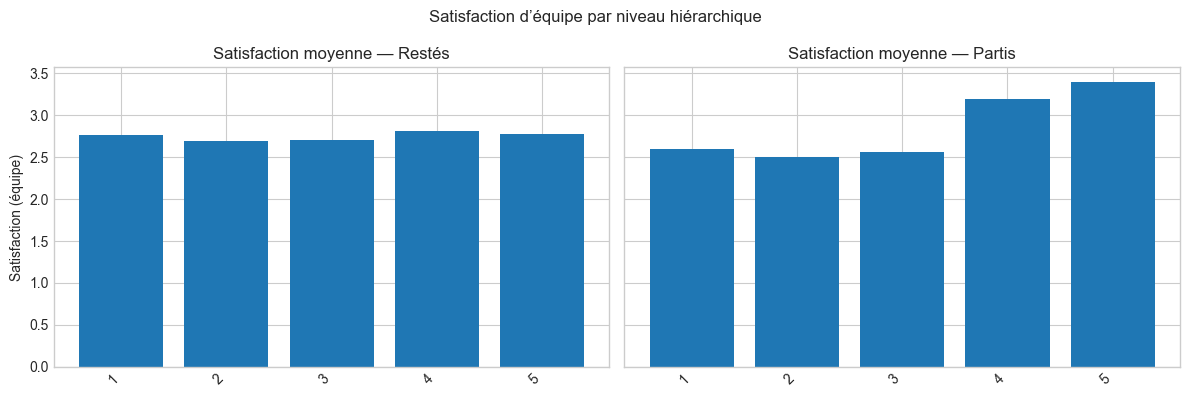

C:\Users\mouto\AppData\Local\Temp\ipykernel_19792\1474741671.py:119: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(data_restes, labels=genres, showfliers=False)
C:\Users\mouto\AppData\Local\Temp\ipykernel_19792\1474741671.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(data_quittes, labels=genres, showfliers=False)


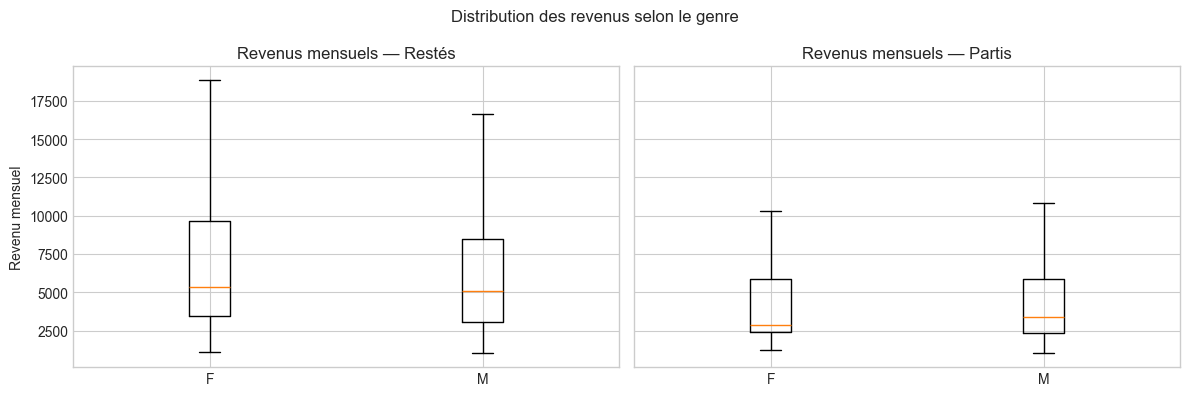

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Normalisation du statut de départ ---
col = "a_quitte_l_entreprise"
joins_df[col] = joins_df[col].astype(str).str.strip().str.lower()

df_quittes = joins_df[joins_df[col] == "oui"].copy()
df_restes  = joins_df[joins_df[col] != "oui"].copy()  # inclut "non", NaN, etc.

print(f"Restés : {len(df_restes)} | Partis : {len(df_quittes)}")

# Petite fonction utilitaire pour harmoniser les axes Y
def match_ylim(ax_left, ax_right):
    ymin = min(ax_left.get_ylim()[0], ax_right.get_ylim()[0])
    ymax = max(ax_left.get_ylim()[1], ax_right.get_ylim()[1])
    ax_left.set_ylim(ymin, ymax)
    ax_right.set_ylim(ymin, ymax)

# =========================
# 1) Histogrammes des âges
# =========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)
bins = 20

ax1.hist(df_restes["age"].dropna(), bins=bins)
ax1.set_title("Âge — Employés restés")
ax1.set_xlabel("Âge"); ax1.set_ylabel("Effectifs")

ax2.hist(df_quittes["age"].dropna(), bins=bins)
ax2.set_title("Âge — Employés partis")
ax2.set_xlabel("Âge")

plt.suptitle("Distribution des âges")
plt.tight_layout()
plt.show()

# ==============================================
# 2) Ancienneté vs Note d’évaluation (scatter)
# ==============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

x_col = "annees_dans_l_entreprise"
y_col = "note_evaluation_actuelle"

# Moyenne par ancienneté pour chaque groupe
moy_restes = df_restes.groupby(x_col)[y_col].mean().reset_index()
moy_quittes = df_quittes.groupby(x_col)[y_col].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)

# Employés restés
sns.lineplot(data=moy_restes, x=x_col, y=y_col, marker="o", ax=ax1, color="steelblue")
ax1.set_title("Restés")
ax1.set_xlabel("Ancienneté (années)")
ax1.set_ylabel("Note d’évaluation")

# Employés partis
sns.lineplot(data=moy_quittes, x=x_col, y=y_col, marker="o", ax=ax2, color="firebrick")
ax2.set_title("Partis")
ax2.set_xlabel("Ancienneté (années)")

plt.suptitle("Lien entre ancienneté et note d’évaluation — comparaison Restés vs Partis")
plt.tight_layout()
plt.show()


# ===========================================================
# 3) Satisfaction d'équipe moyenne par niveau hiérarchique
#    (mêmes catégories affichées dans les deux graphiques)
# ===========================================================
cat_col = "niveau_hierarchique_poste"
val_col = "satisfaction_employee_equipe"

# Moyennes par niveau
m_restes  = df_restes.groupby(cat_col, dropna=False)[val_col].mean()
m_quittes = df_quittes.groupby(cat_col, dropna=False)[val_col].mean()

# Harmoniser l’ordre des catégories
cats = sorted(set(m_restes.index).union(set(m_quittes.index)), key=lambda x: str(x))
m_restes  = m_restes.reindex(cats)
m_quittes = m_quittes.reindex(cats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)

ax1.bar(range(len(cats)), m_restes.values)
ax1.set_xticks(range(len(cats))); ax1.set_xticklabels(cats, rotation=45, ha="right")
ax1.set_title("Satisfaction moyenne — Restés")
ax1.set_ylabel("Satisfaction (équipe)")

ax2.bar(range(len(cats)), m_quittes.values)
ax2.set_xticks(range(len(cats))); ax2.set_xticklabels(cats, rotation=45, ha="right")
ax2.set_title("Satisfaction moyenne — Partis")

match_ylim(ax1, ax2)
plt.suptitle("Satisfaction d’équipe par niveau hiérarchique")
plt.tight_layout()
plt.show()

# ==========================================
# 4) Revenus mensuels — boxplots par genre
#    (mêmes genres affichés des 2 côtés)
# ==========================================
g_col = "genre"
y_rev = "revenu_mensuel"

# Préparer listes par genre
genres = sorted(set(joins_df[g_col].dropna().unique()), key=lambda x: str(x))

data_restes  = [df_restes[df_restes[g_col]==g][y_rev].dropna().values for g in genres]
data_quittes = [df_quittes[df_quittes[g_col]==g][y_rev].dropna().values for g in genres]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)

bp1 = ax1.boxplot(data_restes, labels=genres, showfliers=False)
ax1.set_title("Revenus mensuels — Restés")
ax1.set_ylabel("Revenu mensuel")

bp2 = ax2.boxplot(data_quittes, labels=genres, showfliers=False)
ax2.set_title("Revenus mensuels — Partis")

match_ylim(ax1, ax2)
plt.suptitle("Distribution des revenus selon le genre")
plt.tight_layout()
plt.show()


metric de sortie : predict proba (checkez param)

In [126]:
display(joins_df.columns)

Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'nombre_heures_travailless', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'nombre_employee_sous_responsabilite', 'code_sondage',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'ayant_enfants', 'frequence_deplacement',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel'],
      dtype='object')

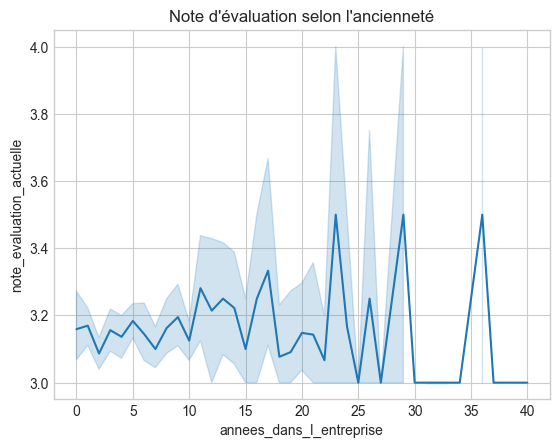

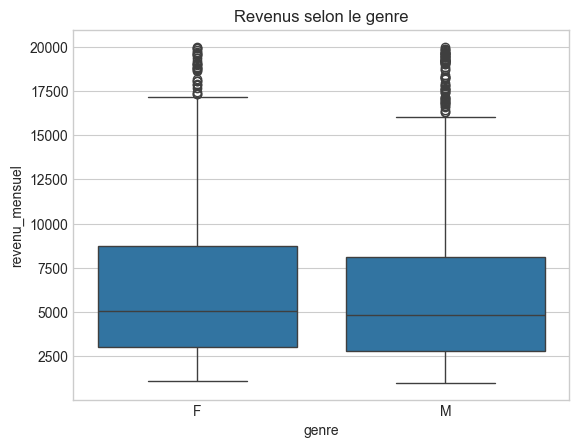

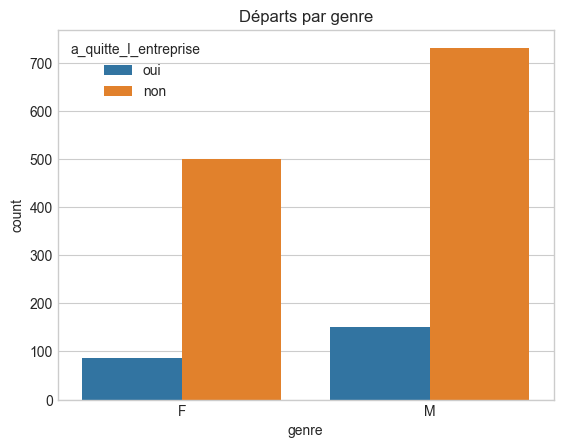

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quanti ↔ Quanti
sns.lineplot(data=joins_df, x="annees_dans_l_entreprise", y="note_evaluation_actuelle")
plt.title("Note d'évaluation selon l'ancienneté")
plt.show()

# Quanti ↔ Quali
sns.boxplot(data=joins_df, x="genre", y="revenu_mensuel")
plt.title("Revenus selon le genre")
plt.show()

# Quali ↔ Quali
sns.countplot(data=joins_df, x="genre", hue="a_quitte_l_entreprise")
plt.title("Départs par genre")
plt.show()


In [128]:
joins_df.isnull().sum()

id_employee                                  0
age                                          0
genre                                        0
revenu_mensuel                               0
statut_marital                               0
departement                                  0
poste                                        0
nombre_experiences_precedentes               0
nombre_heures_travailless                    0
annee_experience_totale                      0
annees_dans_l_entreprise                     0
annees_dans_le_poste_actuel                  0
satisfaction_employee_environnement          0
note_evaluation_precedente                   0
niveau_hierarchique_poste                    0
satisfaction_employee_nature_travail         0
satisfaction_employee_equipe                 0
satisfaction_employee_equilibre_pro_perso    0
eval_number                                  0
note_evaluation_actuelle                     0
heure_supplementaires                        0
augementation

In [129]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = joins_df.columns[1:]

X = joins_df.drop(columns=['a_quitte_l_entreprise'])
y = joins_df['a_quitte_l_entreprise']

print("...Done.")
print()

Separating target variable from features...
...Done.



In [130]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


In [131]:
# Conversion explicite
y_test_num = y_test.astype(str).str.strip().str.lower().map({"oui": 1, "non": 0, "y": 1, "n": 0})


In [132]:
from sklearn.compose import ColumnTransformer, make_column_selector as selector

# === Prétraitement automatique ===
numeric_selector = selector(dtype_include=np.number)
categorical_selector = selector(dtype_exclude=np.number)

feature_encoder = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_selector),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_selector)
    ]
)

# Transformation
X_train_enc = feature_encoder.fit_transform(X_train)
X_test_enc = feature_encoder.transform(X_test)
print("#### X_train AFTER preprocessing ####")
print(X_train_enc[:5, :])
print("Shape :", X_train_enc.shape)



#### X_train AFTER preprocessing ####
[[ 1.53241985  2.3389367   2.41725694 ...  0.          0.
   1.        ]
 [ 0.87305407  0.9043263  -0.91612115 ...  0.          0.
   1.        ]
 [ 0.06566739  0.35255307  0.41020041 ...  0.          0.
   1.        ]
 [-0.400262   -0.08886552  0.23890505 ...  1.          0.
   0.        ]
 [ 0.4138529  -1.30276663 -1.13082263 ...  0.          1.
   0.        ]]
Shape : (1176, 1229)


In [133]:
# === Entraînement du modèle ===
print("\nTrain model...")
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_enc, y_train)
print("✅ ...Done.")


Train model...
✅ ...Done.


In [134]:
print("Train score: ", classifier.score(X_train_enc, y_train))
print("Test score: ", classifier.score(X_test_enc, y_test))

Train score:  0.923469387755102
Test score:  0.8809523809523809


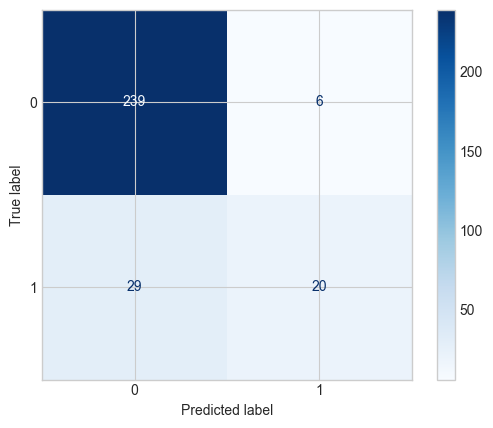

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = classifier.predict(X_test_enc)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")


In [136]:
# Pour un modèle de classification binaire
y_pred_proba = classifier.predict_proba(X_test_enc)[:, 1]  # proba de la classe "1"


In [137]:
from sklearn.metrics import roc_auc_score, log_loss, roc_curve, precision_recall_curve, auc

# AUC ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC ROC : {auc_score:.3f}")

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss : {logloss:.3f}")


AUC ROC : 0.861
Log Loss : 0.310


Valeurs non converties : 0


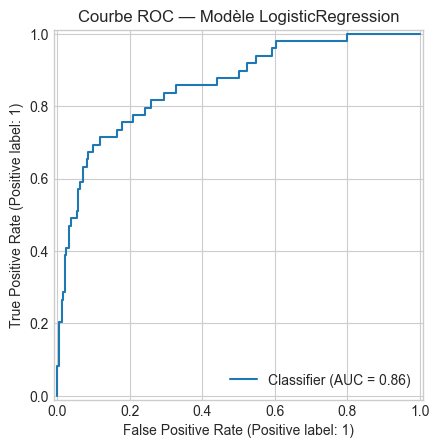

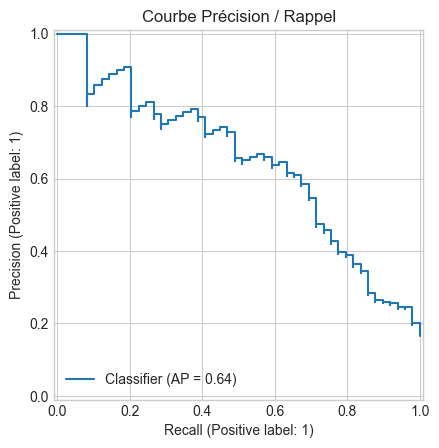

In [138]:
# Normalisation de la cible en numérique
y_test_num = (
    pd.Series(y_test)
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"oui": 1, "non": 0, "y": 1, "n": 0})
)

# Vérifie qu'il n'y a pas de NaN
print("Valeurs non converties :", y_test_num.isna().sum())

# Courbe ROC
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test_num, y_pred_proba)
plt.title("Courbe ROC — Modèle LogisticRegression")
plt.show()

# Courbe Précision / Rappel
PrecisionRecallDisplay.from_predictions(y_test_num, y_pred_proba)
plt.title("Courbe Précision / Rappel")
plt.show()


=== Seuil optimal (max F1) ===
seuil        0.350000
f1           0.632653
precision    0.632653
recall       0.632653
accuracy     0.877551
Name: 5, dtype: float64


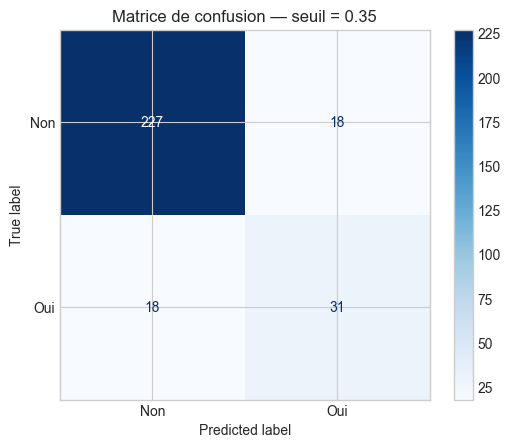


Top seuils par F1 :
   seuil        f1  precision    recall  accuracy
5   0.35  0.632653   0.632653  0.632653  0.877551
4   0.30  0.628571   0.589286  0.673469  0.867347
6   0.40  0.600000   0.658537  0.551020  0.877551
3   0.25  0.588235   0.500000  0.714286  0.833333
7   0.45  0.578313   0.705882  0.489796  0.880952
2   0.20  0.560606   0.445783  0.755102  0.802721
8   0.50  0.533333   0.769231  0.408163  0.880952
1   0.15  0.530612   0.397959  0.795918  0.765306
9   0.55  0.520548   0.791667  0.387755  0.880952
0   0.10  0.482353   0.338843  0.836735  0.700680


In [139]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Convertir y_test en {0,1} une bonne fois
y_test_num = (
    pd.Series(y_test)
    .astype(str).str.strip().str.lower()
    .map({"oui": 1, "non": 0, "y": 1, "n": 0, "true": 1, "false": 0})
)

if y_test_num.isna().any():
    raise ValueError("Certaines valeurs de y_test n'ont pas pu être converties en {0,1}. Vérifie les libellés.")

# 2) Balayage de seuils et métriques
seuils = np.arange(0.10, 0.90, 0.05)
rows = []

for s in seuils:
    preds = (y_pred_proba >= s).astype(int)
    rows.append({
        "seuil": s,
        "f1": f1_score(y_test_num, preds, zero_division=0),
        "precision": precision_score(y_test_num, preds, zero_division=0),
        "recall": recall_score(y_test_num, preds, zero_division=0),
        "accuracy": accuracy_score(y_test_num, preds),
    })

results = pd.DataFrame(rows).sort_values("f1", ascending=False)
best = results.iloc[0]

print("=== Seuil optimal (max F1) ===")
print(best)

# 3) Matrice de confusion au meilleur seuil
best_thresh = best["seuil"]
best_preds = (y_pred_proba >= best_thresh).astype(int)

cm = confusion_matrix(y_test_num, best_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=["Non","Oui"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Matrice de confusion — seuil = {best_thresh:.2f}")
plt.show()

# 4) (optionnel) afficher le tableau trié
print("\nTop seuils par F1 :")
print(results.head(10))


In [141]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, log_loss
)

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# --- 0) y en {0,1} (si tu as 'oui'/'non') ---
def to_binary_series(y, positive=("oui","y","true",1)):
    s = pd.Series(y)
    if pd.api.types.is_numeric_dtype(s):
        return s.astype(int)
    s = s.astype(str).str.strip().str.lower()
    return s.map({positive[0]:1, positive[1]:1, positive[2]:1, "1":1,
                  "non":0, "n":0, "false":0, "0":0}).astype(int)

y_train_bin = to_binary_series(y_train)
y_test_bin  = to_binary_series(y_test)

# --- 1) Préprocesseur : OneHot (cat) + StandardScaler (num) ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), selector(dtype_exclude=np.number)),
    ],
    remainder="drop",
)

# --- 2) Fonction d'évaluation (compatible Pipeline) ---
def get_positive_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s = (s - s.min()) / (s.max() - s.min() + 1e-12)  # normalisation pour AUC
        return s
    else:
        return model.predict(X)

def evaluate_classifier(pipeline, X_train, y_train, X_test, y_test, name):
    pipeline.fit(X_train, y_train)
    y_tr_proba = get_positive_scores(pipeline, X_train)
    y_te_proba = get_positive_scores(pipeline, X_test)

    y_tr_pred = (y_tr_proba >= 0.5).astype(int)
    y_te_pred = (y_te_proba >= 0.5).astype(int)

    acc_tr = accuracy_score(y_train, y_tr_pred); acc_te = accuracy_score(y_test, y_te_pred)
    f1_tr  = f1_score(y_train, y_tr_pred, zero_division=0); f1_te = f1_score(y_test, y_te_pred, zero_division=0)
    prec   = precision_score(y_test, y_te_pred, zero_division=0)
    rec    = recall_score(y_test, y_te_pred, zero_division=0)
    try: auc = roc_auc_score(y_test, y_te_proba)
    except: auc = np.nan
    try: ll  = log_loss(y_test, np.clip(y_te_proba, 1e-6, 1-1e-6))
    except: ll = np.nan

    print(f"\n📊 {name}")
    print(f"Accuracy  Train/Test : {acc_tr:.4f} / {acc_te:.4f}")
    print(f"F1        Train/Test : {f1_tr:.4f} / {f1_te:.4f}")
    print(f"Precision Test       : {prec:.4f}")
    print(f"Recall    Test       : {rec:.4f}")
    print(f"ROC-AUC   Test       : {auc:.4f}")
    print(f"LogLoss   Test       : {ll:.4f}")

    return {"Model": name, "ACC_test": acc_te, "F1_test": f1_te,
            "Precision_test": prec, "Recall_test": rec,
            "ROC_AUC_test": auc, "LogLoss_test": ll}

# --- 3) Liste des modèles encapsulés dans un Pipeline(preprocessor -> model) ---
models = [
    ("LogisticRegression", Pipeline([("prep", preprocessor),
                                     ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))])),
    ("RidgeClassifier",    Pipeline([("prep", preprocessor),
                                     ("clf", RidgeClassifier(class_weight="balanced"))])),
    ("SVC_rbf",            Pipeline([("prep", preprocessor),
                                     ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))])),
    ("LinearSVC",          Pipeline([("prep", preprocessor),
                                     ("clf", LinearSVC(class_weight="balanced", random_state=42))])),
    ("RandomForest",       Pipeline([("prep", preprocessor),
                                     ("clf", RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"))])),
    ("GradBoost",          Pipeline([("prep", preprocessor),
                                     ("clf", GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42))])),
    ("XGBoost",            Pipeline([("prep", preprocessor),
                                     ("clf", XGBClassifier(n_estimators=300, learning_rate=0.05, random_state=42, eval_metric="logloss"))])),
    ("LightGBM",           Pipeline([("prep", preprocessor),
                                     ("clf", LGBMClassifier(n_estimators=300, learning_rate=0.05, random_state=42))])),
    ("CatBoost",           Pipeline([("prep", preprocessor),
                                     ("clf", CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, random_state=42, verbose=0))])),
]

# --- 4) Évaluation comparée ---
results = []
for name, pipe in models:
    results.append(evaluate_classifier(pipe, X_train, y_train_bin, X_test, y_test_bin, name))

results_df = pd.DataFrame(results)
print("\n=== Résultats comparatifs (triés par F1_test) ===")
print(results_df.sort_values(by="F1_test", ascending=False))



📊 LogisticRegression
Accuracy  Train/Test : 0.8954 / 0.8095
F1        Train/Test : 0.7377 / 0.5625
Precision Test       : 0.4557
Recall    Test       : 0.7347
ROC-AUC   Test       : 0.8572
LogLoss   Test       : 0.4070

📊 RidgeClassifier
Accuracy  Train/Test : 0.9821 / 0.5748
F1        Train/Test : 0.9471 / 0.4186
Precision Test       : 0.2711
Recall    Test       : 0.9184
ROC-AUC   Test       : 0.8546
LogLoss   Test       : 0.6757

📊 SVC_rbf
Accuracy  Train/Test : 0.9668 / 0.8741
F1        Train/Test : 0.8920 / 0.5067
Precision Test       : 0.7308
Recall    Test       : 0.3878
ROC-AUC   Test       : 0.8444
LogLoss   Test       : 0.3226

📊 LinearSVC
Accuracy  Train/Test : 0.6913 / 0.5000
F1        Train/Test : 0.5088 / 0.3797
Precision Test       : 0.2394
Recall    Test       : 0.9184
ROC-AUC   Test       : 0.8546
LogLoss   Test       : 0.7218

📊 RandomForest
Accuracy  Train/Test : 1.0000 / 0.8503
F1        Train/Test : 1.0000 / 0.2143
Precision Test       : 0.8571
Recall    Test     